This File is to run the TVDN algorithm on AD and Control data and save the results

(**I didn't consider the selection at this stage**)

In [1]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN-AD")

In [2]:
from pyTVDN import TVDNDetect
from pathlib import Path
from scipy.io import loadmat, savemat
import numpy as np
from easydict import EasyDict as edict
import matplotlib
import matplotlib.pyplot as plt
import os
from scipy import signal
from tqdm import tqdm
import pickle
%matplotlib inline

In [3]:
os.chdir("/home/huaqingj/MyResearch/TVDN-AD")
resDir = Path("./results")
dataDir = Path("./data")

In [4]:
filAD = "87ADs_before_filter1000.mat" # 0-86
filCtrl = "70Ctrls_before_filter1000.mat" #0-69
filADadd = "DK_timecourse.mat" # 87
filCtrladd = "timecourse_ucsfCONT_group.mat" # 70-91

In [5]:
smADIdxs = [
    20,  
    42, 
    44, 
    45, 
    47, 
    48, 
    57, 
    58, 
    61, 
    62, 
    63, 
    65, 
    81, 
    82, 
    83, 
    87, 
]

smADIdxs = np.array(smADIdxs)- 1

In [6]:
smCtrlIdxs = [
    5,  
    6, 
    7, 
    8, 
    9, 
    10, 
    11, 
    12, 
    13, 
    14, 
    16, 
    17, 
    19, 
    21, 
    22, 
    24, 
    25, 
    26, 
    29, 
    30, 
    32, 
    33, 
    35, 
    38, 
    39, 
    57, 
    59, 
    60, 
    61, 
    62, 
    63, 
    64, 
    66, 
    67, 
    68, 
    69, 
    70, 
]
smCtrlIdxs = np.array(smCtrlIdxs) - 1

## Run data with TVDN

### Load the datasets

Note we have addtional data for AD

In [7]:
ADdatasets = loadmat(dataDir/filAD)["dk10"]
Ctrldatasets = loadmat(dataDir/filCtrl)["dk10"]

In [8]:
ADdatAdd = loadmat(dataDir/filADadd)["DK_timecourse"]

In [9]:
import mat73
CtrldatAdd = mat73.loadmat(dataDir/filCtrladd)["dk10"]

### Filtering the new control datasets


In [10]:
from scipy import signal
# sampling freq is 600Hz

In [11]:
sos = signal.butter(N=10, Wn=[8, 12], btype='bp', fs=600, output='sos') # alpha
#sos = signal.butter(N=10, Wn=0.002, btype='hp', fs=600, output='sos') # filter
loB, upB = 2000, -1

#### Plot the results

  0%|          | 0/87 [00:00<?, ?it/s]

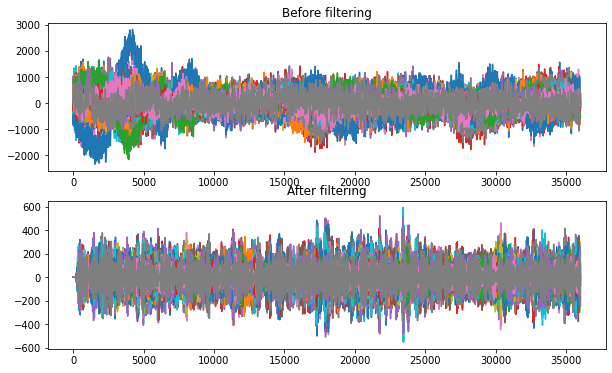

  1%|          | 1/87 [00:01<01:31,  1.06s/it]

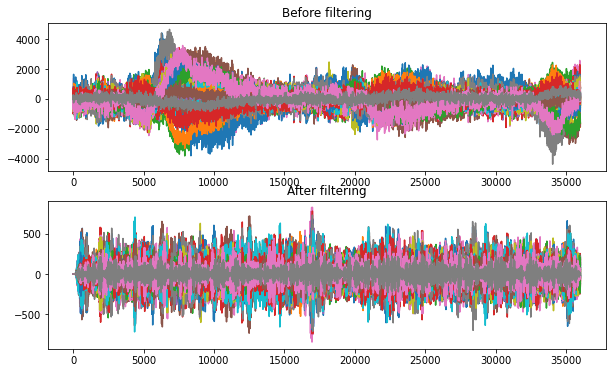

  2%|▏         | 2/87 [00:02<01:29,  1.05s/it]

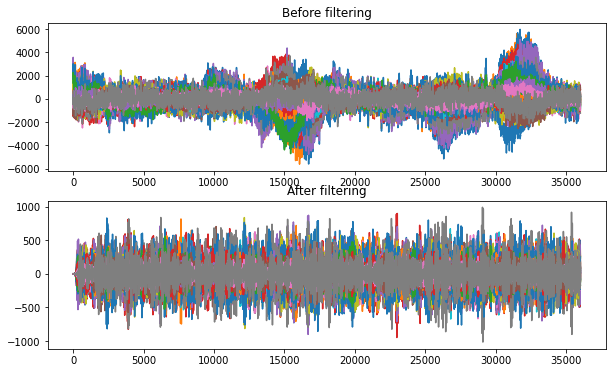

  3%|▎         | 3/87 [00:03<01:30,  1.07s/it]

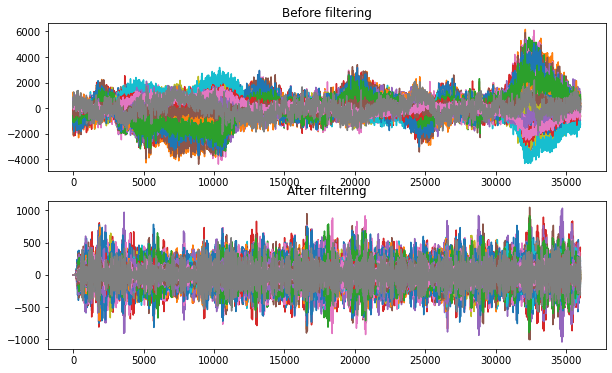

  5%|▍         | 4/87 [00:04<01:27,  1.05s/it]

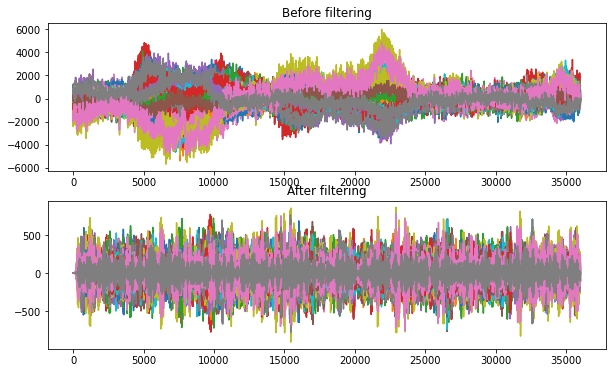

  6%|▌         | 5/87 [00:05<01:25,  1.04s/it]

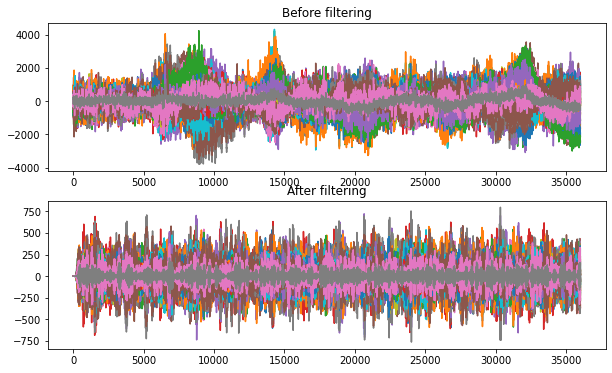

  7%|▋         | 6/87 [00:06<01:24,  1.04s/it]

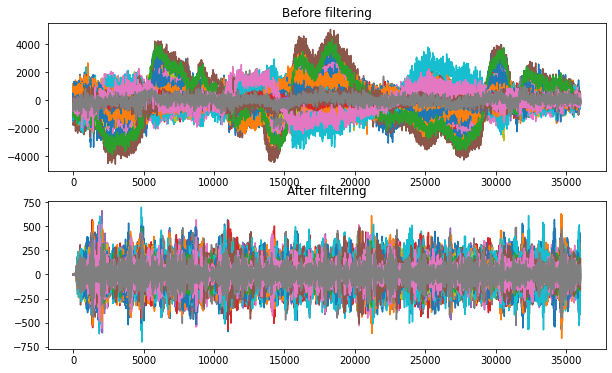

  8%|▊         | 7/87 [00:07<01:24,  1.06s/it]

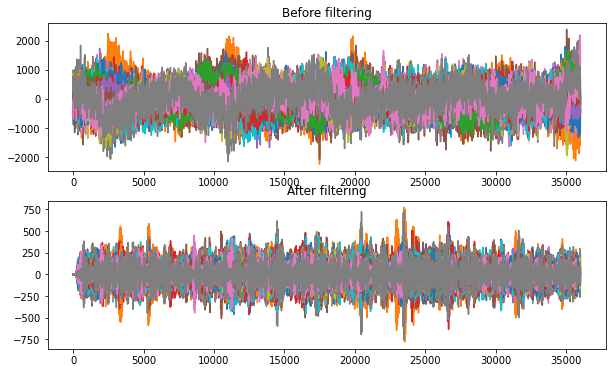

  9%|▉         | 8/87 [00:08<01:24,  1.06s/it]

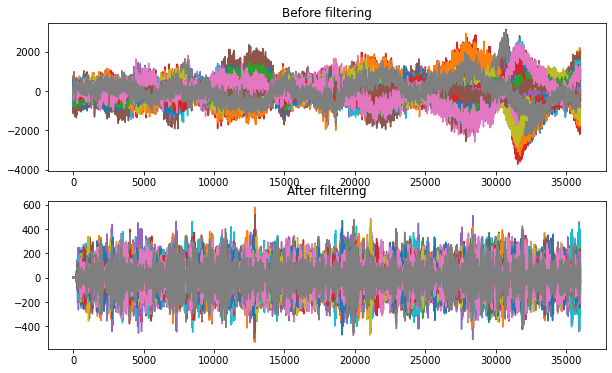

 10%|█         | 9/87 [00:09<01:22,  1.05s/it]

 11%|█▏        | 10/87 [00:10<01:20,  1.04s/it]

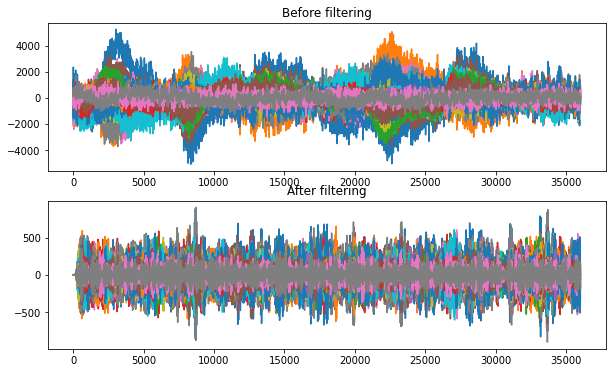

 13%|█▎        | 11/87 [00:11<01:19,  1.05s/it]

 14%|█▍        | 12/87 [00:12<01:18,  1.05s/it]

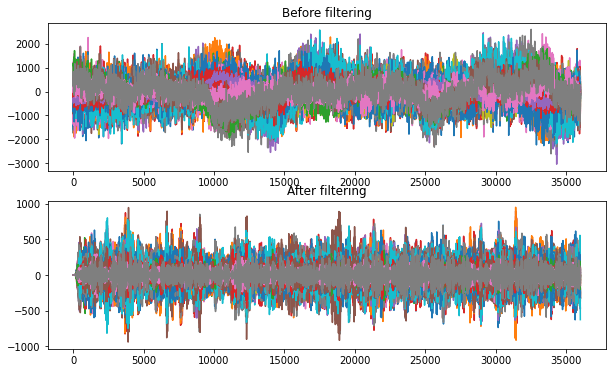

 15%|█▍        | 13/87 [00:13<01:18,  1.06s/it]

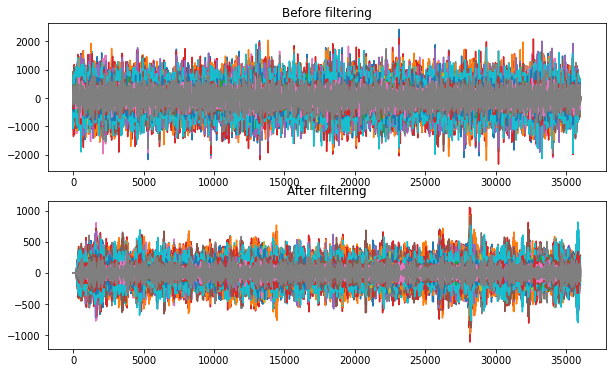

 16%|█▌        | 14/87 [00:14<01:19,  1.09s/it]

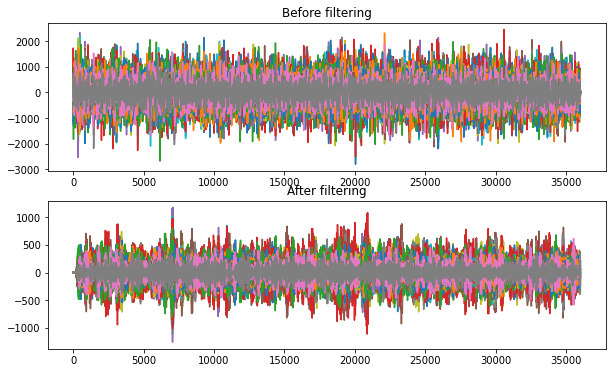

 17%|█▋        | 15/87 [00:15<01:18,  1.09s/it]

 18%|█▊        | 16/87 [00:17<01:19,  1.12s/it]

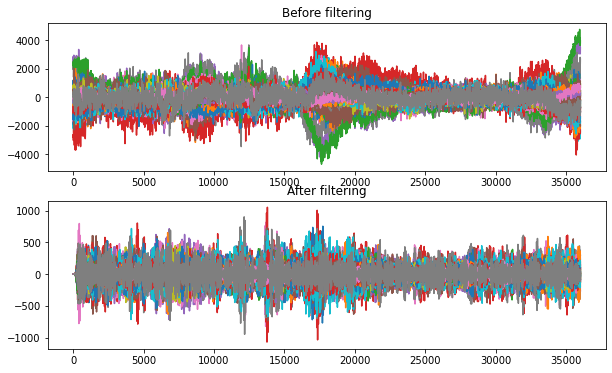

 20%|█▉        | 17/87 [00:18<01:15,  1.07s/it]

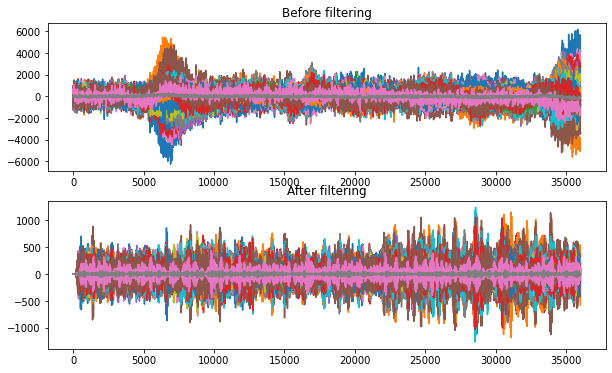

 21%|██        | 18/87 [00:19<01:13,  1.07s/it]

 22%|██▏       | 19/87 [00:20<01:10,  1.04s/it]

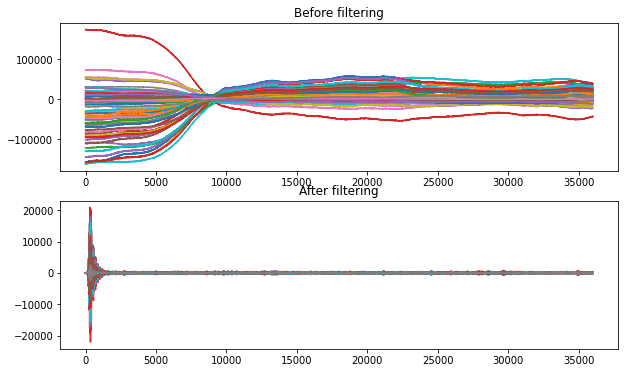

 23%|██▎       | 20/87 [00:20<01:03,  1.06it/s]

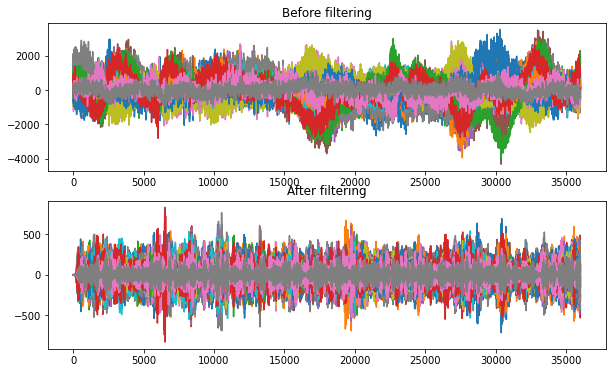

 24%|██▍       | 21/87 [00:21<01:03,  1.04it/s]

 25%|██▌       | 22/87 [00:22<01:04,  1.01it/s]

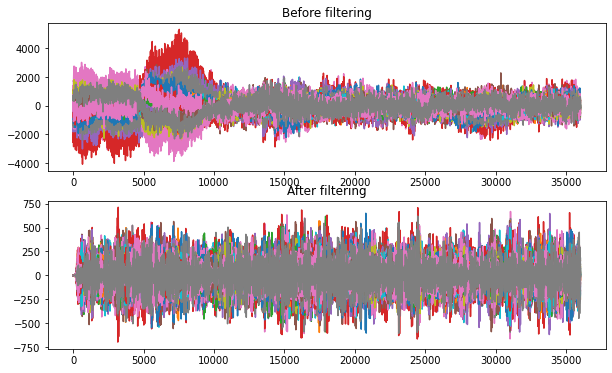

 26%|██▋       | 23/87 [00:23<01:04,  1.00s/it]

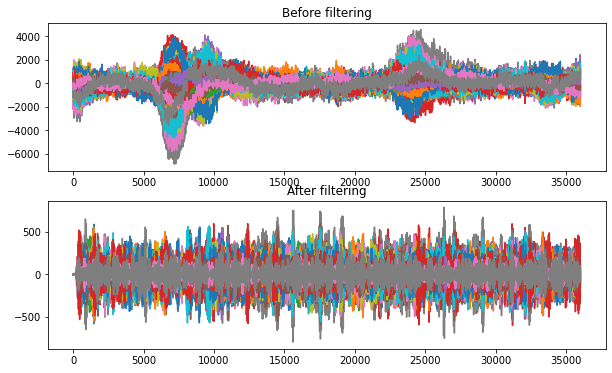

 28%|██▊       | 24/87 [00:24<01:03,  1.00s/it]

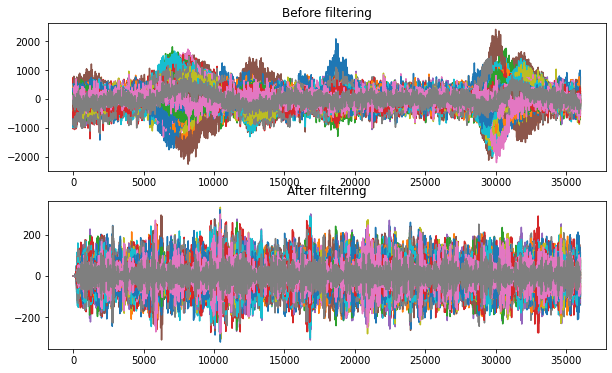

 29%|██▊       | 25/87 [00:26<01:03,  1.03s/it]

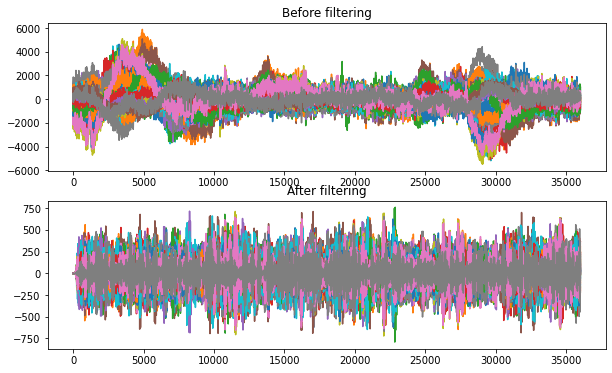

 30%|██▉       | 26/87 [00:27<01:03,  1.03s/it]

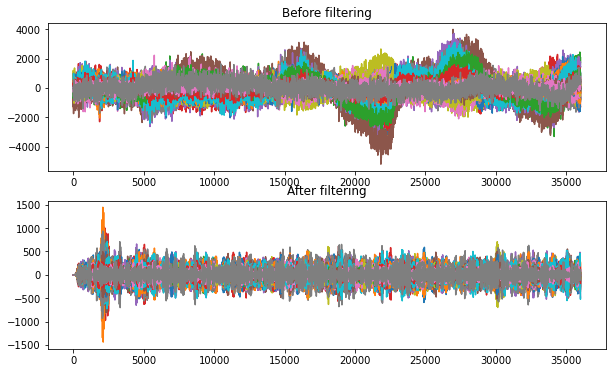

 31%|███       | 27/87 [00:28<01:00,  1.01s/it]

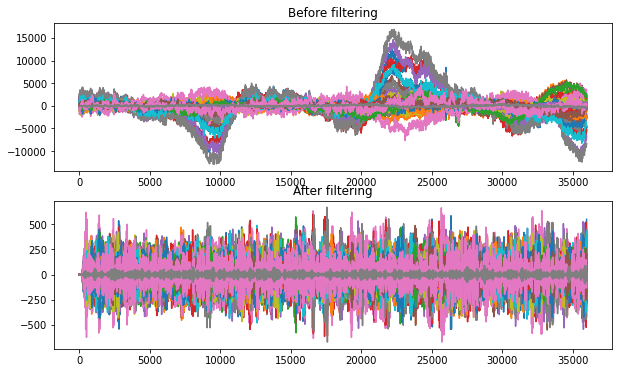

 32%|███▏      | 28/87 [00:29<00:59,  1.00s/it]

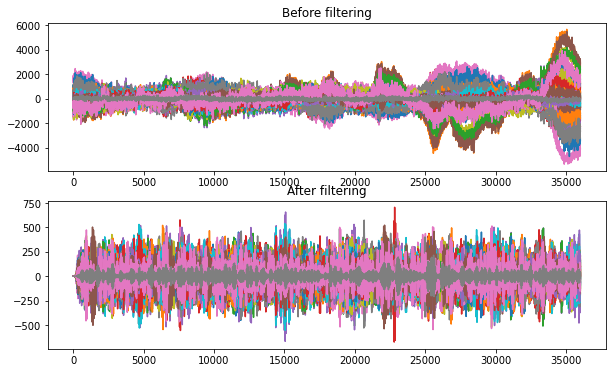

 33%|███▎      | 29/87 [00:30<00:59,  1.02s/it]

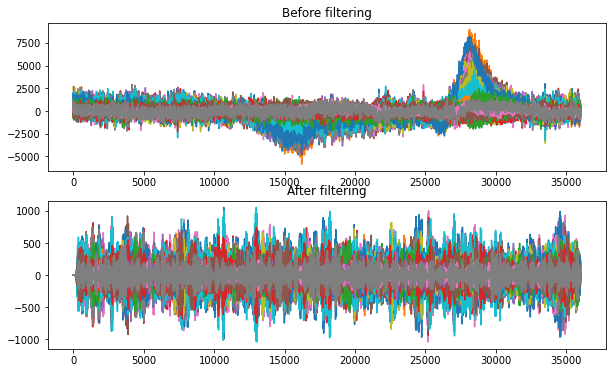

 34%|███▍      | 30/87 [00:31<00:58,  1.02s/it]

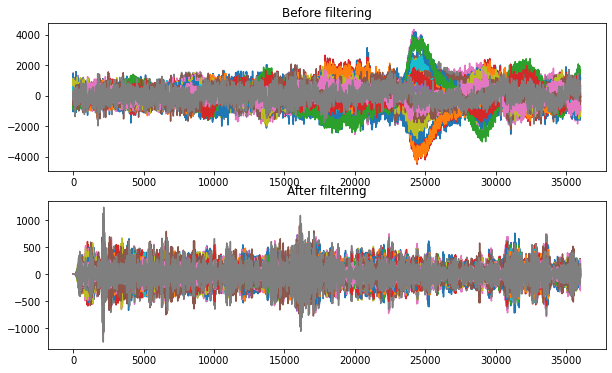

 36%|███▌      | 31/87 [00:32<00:56,  1.00s/it]

 37%|███▋      | 32/87 [00:33<00:55,  1.01s/it]

 38%|███▊      | 33/87 [00:34<00:58,  1.08s/it]

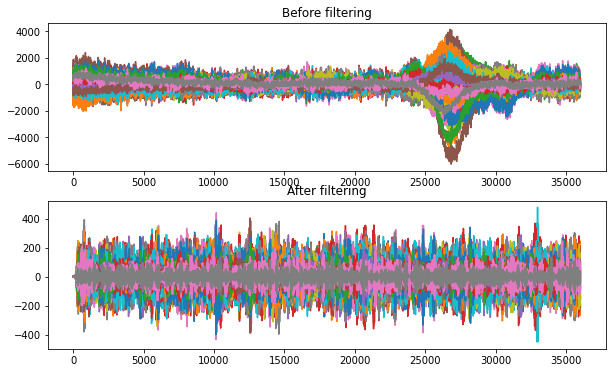

 39%|███▉      | 34/87 [00:35<00:56,  1.07s/it]

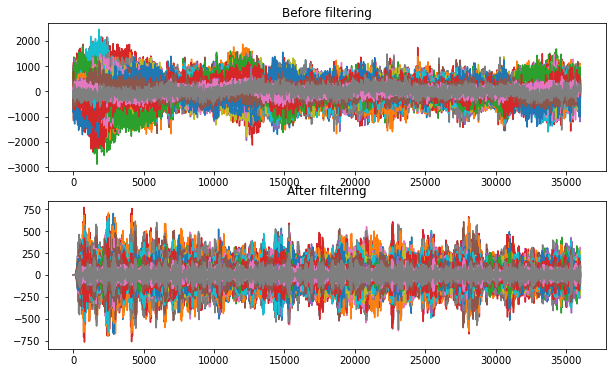

 40%|████      | 35/87 [00:36<00:55,  1.07s/it]

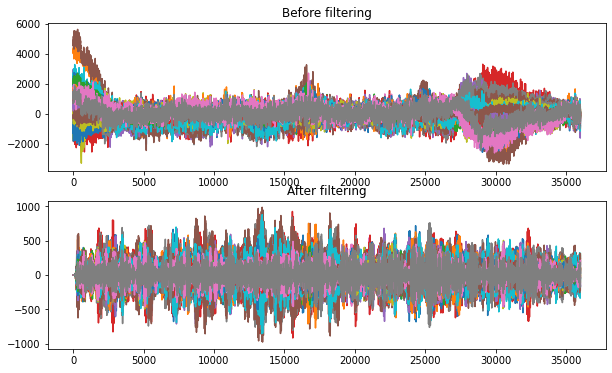

 41%|████▏     | 36/87 [00:37<00:54,  1.06s/it]

 43%|████▎     | 37/87 [00:38<00:52,  1.05s/it]

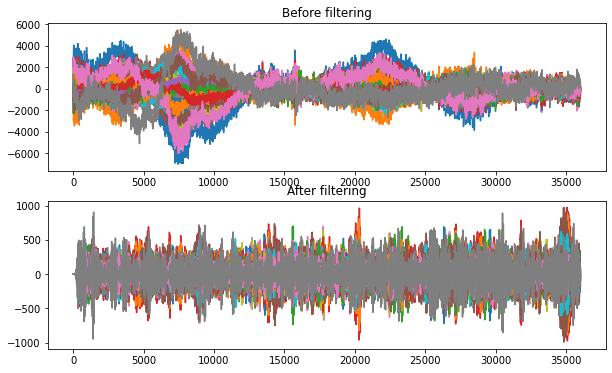

 44%|████▎     | 38/87 [00:39<00:50,  1.03s/it]

 45%|████▍     | 39/87 [00:40<00:50,  1.04s/it]

 46%|████▌     | 40/87 [00:41<00:51,  1.09s/it]

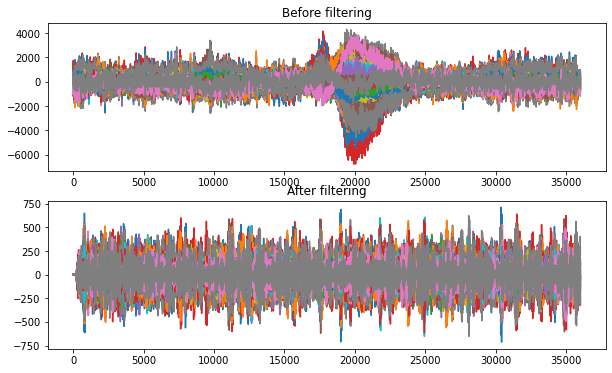

 47%|████▋     | 41/87 [00:42<00:49,  1.07s/it]

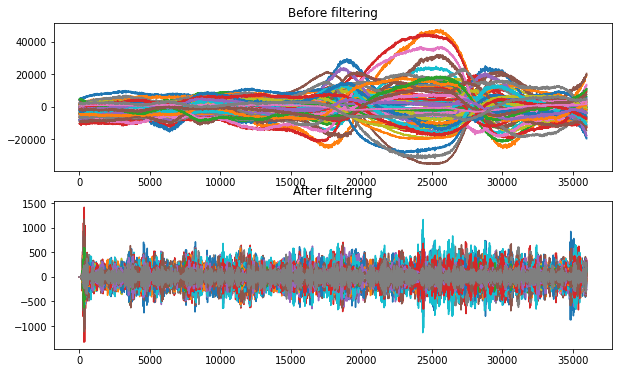

 48%|████▊     | 42/87 [00:43<00:45,  1.02s/it]

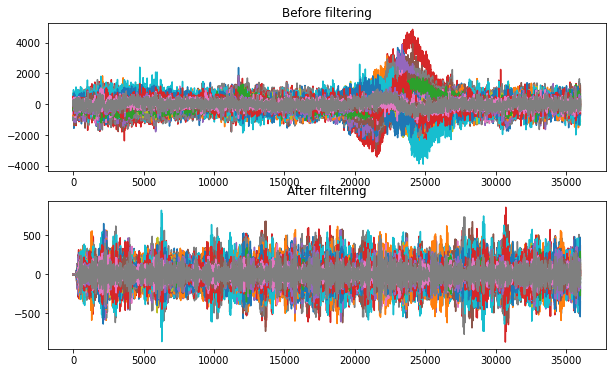

 49%|████▉     | 43/87 [00:44<00:44,  1.02s/it]

 51%|█████     | 44/87 [00:45<00:41,  1.03it/s]

 52%|█████▏    | 45/87 [00:46<00:39,  1.07it/s]

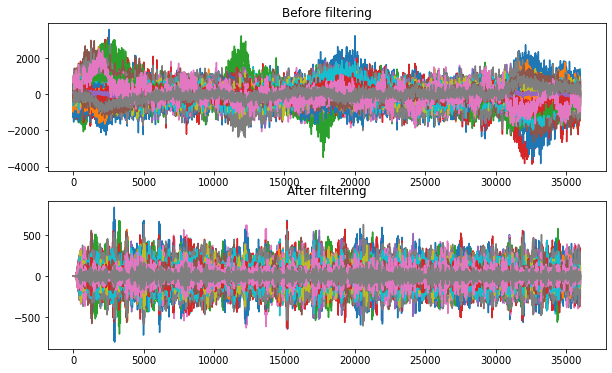

 53%|█████▎    | 46/87 [00:47<00:39,  1.04it/s]

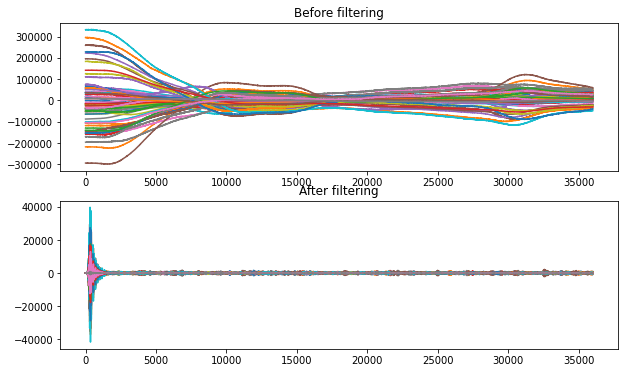

 54%|█████▍    | 47/87 [00:48<00:35,  1.11it/s]

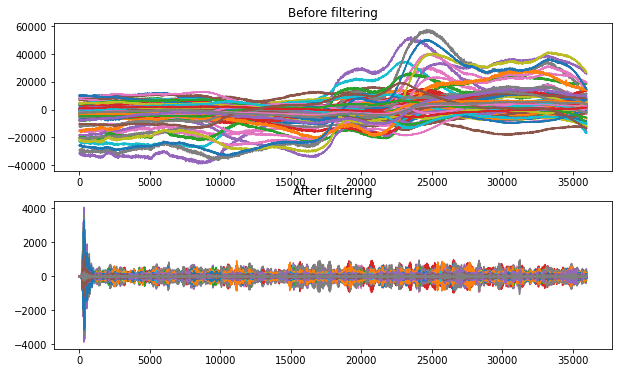

 55%|█████▌    | 48/87 [00:48<00:34,  1.15it/s]

KeyboardInterrupt: 

In [42]:
for ixx in tqdm(range(87)):
    plt.figure(figsize=[10, 6])
    curDat = ADdatasets[ixx, :, :]
    
    plt.subplot(211)
    plt.title("Before filtering")
    for ix in range(curDat.shape[0]):
        plt.plot(curDat[ix, :])
        
    filtered = signal.sosfilt(sos, curDat)
    plt.subplot(212)
    plt.title("After filtering")
    for ix in range(curDat.shape[0]):
        plt.plot(filtered[ix, loB:upB])
    #plt.savefig(f"AD{ixx}.jpg")
    plt.show()
    plt.close()

In [56]:
plt.figure(figsize=[10, 6])
curDat = ADdatAdd
plt.subplot(211)
plt.title("Before filtering")
for ix in range(curDat.shape[0]):
    plt.plot(curDat[ix, :])
filtered = signal.sosfilt(sos, curDat)
plt.subplot(212)
plt.title("After filtering")
for ix in range(curDat.shape[0]):
    plt.plot(filtered[ix, loB:upB])
#plt.savefig(f"AD{87}.jpg")
plt.show()
plt.close()

In [ ]:
for ixx in tqdm(range(70)):
    plt.figure(figsize=[10, 6])
    curDat = Ctrldatasets[ixx, :, :]
    
    plt.subplot(211)
    plt.title("Before filtering")
    for ix in range(curDat.shape[0]):
        plt.plot(curDat[ix, :])
        
    filtered = signal.sosfilt(sos, curDat)
    plt.subplot(212)
    plt.title("After filtering")
    for ix in range(curDat.shape[0]):
        plt.plot(filtered[ix, loB:upB])
    #plt.savefig(f"Ctrl{ixx}.jpg")
    plt.show()
    plt.close()

In [ ]:
for ixx in tqdm(range(22)):
    plt.figure(figsize=[10, 6])
    curDat = CtrldatAdd[ixx, :, :]
    
    plt.subplot(211)
    plt.title("Before filtering")
    for ix in range(curDat.shape[0]):
        plt.plot(curDat[ix, :])
        
    filtered = signal.sosfilt(sos, curDat)
    plt.subplot(212)
    plt.title("After filtering")
    for ix in range(curDat.shape[0]):
        plt.plot(filtered[ix, loB:upB])
    #plt.savefig(f"Ctrl{ixx+70}.jpg")
    plt.show()
    plt.close()

#### Filter and trunc the data

In [12]:
ADdataAfter = []

for ix in tqdm(range(88)):
    if ix < 87:
        curDat = ADdatasets[ix, :, :]
    else:
        curDat = ADdatAdd
    filtered = signal.sosfilt(sos, curDat)
    ADdataAfter.append(filtered[:, loB:])
with open(dataDir/"ADAlpFiltered.pkl", "wb") as wf:
    pickle.dump(ADdataAfter, wf)

100%|██████████| 88/88 [00:05<00:00, 15.70it/s]


In [13]:
CtrldataAfter = []

for ix in tqdm(range(92)):
    if ix < 70:
        curDat = Ctrldatasets[ix, :, :]
    else:
        curDat = CtrldatAdd[ix-70, :, :]
    filtered = signal.sosfilt(sos, curDat)
    CtrldataAfter.append(filtered[:, loB:])
with open(dataDir/"CtrlAlpFiltered.pkl", "wb") as wf:
    pickle.dump(CtrldataAfter, wf)

100%|██████████| 92/92 [00:06<00:00, 14.77it/s]


### Run TVDN 

#### Parameters for TVDN

In [14]:
paras = edict()
paras.Lmin = 200
paras.wh = 10
paras.MaxM = 20
paras.fct = 0.5
paras.r = None
paras.lamb = 1e-4 # it is what I used
paras.T = 2
paras.is_detrend = True
paras.decimateRate = 5
paras.kappa = 3.005
paras.downRate = 20

if paras.decimateRate is None:
    paras.freq = 600
else:
    paras.freq = int(600/paras.decimateRate)

In [15]:
kps = np.linspace(1, 4, 1000)

#### On original datasets

##### Run Kappa tuning algorithm 

In [10]:
for idx in tqdm(range(ADdatasets.shape[0])):
    ADdataset = ADdatasets[idx, :, :]
    detADa = []
    for i in range(5):
        detADt = TVDNDetect(Ymat=ADdataset[:, i::5], dataType="MEG", 
                             saveDir=None, 
                             showProgress=False, 
                             fName="demoMEG",
                             MaxM=paras.MaxM,
                             Lmin=paras.Lmin, 
                             lamb=paras.lamb, 
                             kappa=paras.kappa, 
                             freq=paras.freq,
                             r=paras.r,
                             T=paras.T,
                             is_detrend=paras.is_detrend,
                             decimateRate=None, 
                             downRate=paras.downRate)
        detADt.Screening(wh=paras.wh)
        detADt()
        detADt.TuningKappa(kps)
        detADa.append(detADt)
        
    saveFil = f"AD_data_det_{idx}_lamb{paras.lamb:.1E}_decimate{paras.decimateRate:.0f}_tuning.pkl"
    with open(resDir/saveFil, "wb") as f:
         pickle.dump(detADa, f)

100%|██████████| 87/87 [3:22:12<00:00, 139.45s/it]  


In [62]:
idx = 87
detADa = []
for i in range(5):
    detADt = TVDNDetect(Ymat=ADdatAdd[:, i::5], dataType="MEG", 
                             saveDir=None, 
                             showProgress=False, 
                             fName="demoMEG",
                             MaxM=paras.MaxM,
                             Lmin=paras.Lmin, 
                             lamb=paras.lamb, 
                             kappa=paras.kappa, 
                             freq=paras.freq,
                             r=paras.r,
                             T=paras.T,
                             is_detrend=paras.is_detrend,
                             decimateRate=None, 
                             downRate=paras.downRate)
    detADt.Screening(wh=paras.wh)
    detADt()
    detADt.TuningKappa(kps)
    detADa.append(detADt)
        
saveFil = f"AD_data_det_{idx}_lamb{paras.lamb:.1E}_decimate{paras.decimateRate:.0f}_tuning.pkl"
with open(resDir/saveFil, "wb") as f:
    pickle.dump(detADa, f)

In [58]:
for idx in tqdm(range(Ctrldatasets.shape[0])):
    Ctrldataset = Ctrldatasets[idx, :, :]
    detCa = []
    for i in range(5):
        detCt = TVDNDetect(Ymat=Ctrldataset[:, i::5], dataType="MEG", 
                             saveDir=None, 
                             showProgress=False, 
                             fName="demoMEG",
                             MaxM=paras.MaxM,
                             Lmin=paras.Lmin, 
                             lamb=paras.lamb, 
                             kappa=paras.kappa, 
                             freq=paras.freq,
                             r=paras.r,
                             T=paras.T,
                             is_detrend=paras.is_detrend,
                             decimateRate=None, 
                             downRate=paras.downRate)
        detCt.Screening(wh=paras.wh)
        detCt()
        detCt.TuningKappa(kps)
        detCa.append(detCt)
        
    saveFil = f"Ctrl_data_det_{idx}_lamb{paras.lamb:.1E}_decimate{paras.decimateRate:.0f}_tuning.pkl"
    with open(resDir/saveFil, "wb") as f:
        pickle.dump(detCa, f)

100%|██████████| 70/70 [2:25:15<00:00, 124.50s/it]  


In [59]:
for idx in tqdm(range(CtrldatAdd.shape[0])):
    Ctrldataset = CtrldatAdd[idx, :, :]
    detCa = []
    for i in range(5):
        detCt = TVDNDetect(Ymat=Ctrldataset[:, i::5], dataType="MEG", 
                             saveDir=None, 
                             showProgress=False, 
                             fName="demoMEG",
                             MaxM=paras.MaxM,
                             Lmin=paras.Lmin, 
                             lamb=paras.lamb, 
                             kappa=paras.kappa, 
                             freq=paras.freq,
                             r=paras.r,
                             T=paras.T,
                             is_detrend=paras.is_detrend,
                             decimateRate=None, 
                             downRate=paras.downRate)
        detCt.Screening(wh=paras.wh)
        detCt()
        detCt.TuningKappa(kps)
        detCa.append(detCt)
        
    saveFil = f"Ctrl_data_det_{idx+70}_lamb{paras.lamb:.1E}_decimate{paras.decimateRate:.0f}_tuning.pkl"
    with open(resDir/saveFil, "wb") as f:
        pickle.dump(detCa, f)

100%|██████████| 22/22 [32:36<00:00, 88.93s/it] 


##### Run Main TVDN without tuning kappa

$\kappa$ will be tuned another file

In [12]:
for idx in tqdm(range(ADdatasets.shape[0])):
    ADdataset = ADdatasets[idx, :, :]
    detAD = TVDNDetect(Ymat=ADdataset, dataType="MEG", 
                         saveDir=None, 
                         showProgress=False, 
                         fName="demoMEG",
                         MaxM=paras.MaxM,
                         Lmin=paras.Lmin, 
                         lamb=paras.lamb, 
                         kappa=paras.kappa, 
                         freq=paras.freq,
                         r=paras.r,
                         T=paras.T,
                         is_detrend=paras.is_detrend,
                         decimateRate=paras.decimateRate, 
                         downRate=paras.downRate)
    detAD.Screening(wh=paras.wh)
    detAD()
    detAD.TuningKappa(kps)
    
    saveFil = f"AD_data_det_{idx}_lamb{paras.lamb:.1E}_decimate{paras.decimateRate:.0f}.pkl"
    with open(resDir/saveFil, "wb") as f:
        pickle.dump(detAD, f)

  0%|          | 0/87 [00:00<?, ?it/s]R[write to console]: 
Attaching package: ‘signal’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, poly


100%|██████████| 87/87 [43:39<00:00, 30.10s/it]  


In [13]:
idx = 87
detAD = TVDNDetect(Ymat=ADdatAdd, dataType="MEG", 
                         saveDir=None, 
                         showProgress=False, 
                         fName="demoMEG",
                         MaxM=paras.MaxM,
                         Lmin=paras.Lmin, 
                         lamb=paras.lamb, 
                         kappa=paras.kappa, 
                         freq=paras.freq,
                         r=paras.r,
                         T=paras.T,
                         is_detrend=paras.is_detrend,
                         decimateRate=paras.decimateRate, 
                         downRate=paras.downRate)
detAD.Screening(wh=paras.wh)
detAD()
detAD.TuningKappa(kps)
    
saveFil = f"AD_data_det_{idx}_lamb{paras.lamb:.1E}_decimate{paras.decimateRate:.0f}.pkl"
with open(resDir/saveFil, "wb") as f:
    pickle.dump(detAD, f)

In [60]:
for idx in tqdm(range(Ctrldatasets.shape[0])):
    Ctrldataset = Ctrldatasets[idx, :, :]
    detC = TVDNDetect(Ymat=Ctrldataset, dataType="MEG", 
                         saveDir=None, 
                         showProgress=False, 
                         fName="demoMEG",
                         MaxM=paras.MaxM,
                         Lmin=paras.Lmin, 
                         lamb=paras.lamb, 
                         kappa=paras.kappa, 
                         freq=paras.freq,
                         r=paras.r,
                         T=paras.T,
                         is_detrend=paras.is_detrend,
                         decimateRate=paras.decimateRate, 
                         downRate=paras.downRate)
    detC.Screening(wh=paras.wh)
    detC()
    detC.TuningKappa(kps)
    
    saveFil = f"Ctrl_data_det_{idx}_lamb{paras.lamb:.1E}_decimate{paras.decimateRate:.0f}.pkl"
    with open(resDir/saveFil, "wb") as f:
        pickle.dump(detC, f)

  0%|          | 0/70 [00:00<?, ?it/s]R[write to console]: 
Attaching package: ‘signal’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, poly


100%|██████████| 70/70 [30:17<00:00, 25.96s/it]


In [61]:
for idx in tqdm(range(CtrldatAdd.shape[0])):
    Ctrldataset = CtrldatAdd[idx, :, :]
    detC = TVDNDetect(Ymat=Ctrldataset, dataType="MEG", 
                         saveDir=None, 
                         showProgress=False, 
                         fName="demoMEG",
                         MaxM=paras.MaxM,
                         Lmin=paras.Lmin, 
                         lamb=paras.lamb, 
                         kappa=paras.kappa, 
                         freq=paras.freq,
                         r=paras.r,
                         T=paras.T,
                         is_detrend=paras.is_detrend,
                         decimateRate=paras.decimateRate, 
                         downRate=paras.downRate)
    detC.Screening(wh=paras.wh)
    detC()
    detC.TuningKappa(kps)
    
    saveFil = f"Ctrl_data_det_{idx+70}_lamb{paras.lamb:.1E}_decimate{paras.decimateRate:.0f}.pkl"
    with open(resDir/saveFil, "wb") as f:
        pickle.dump(detC, f)

100%|██████████| 22/22 [06:58<00:00, 19.03s/it]


#### On filtered datasets

In [17]:
with open(dataDir/"ADAlpFiltered.pkl", "rb") as rf:
    ADdataAfter = pickle.load(rf)
with open(dataDir/"CtrlAlpFiltered.pkl", "rb") as rf:
    CtrldataAfter = pickle.load(rf)

##### Run Kappa tuning algorithm 

In [ ]:
# in fact, we tune kappa only with datasets from control
for idx in tqdm(range(len(ADdataAfter))):
    ADdataset = ADdataAfter[idx]
    detADa = []
    for i in range(5):
        detADt = TVDNDetect(Ymat=ADdataset[:, i::5], dataType="MEG", 
                             saveDir=None, 
                             showProgress=False, 
                             fName="demoMEG",
                             MaxM=paras.MaxM,
                             Lmin=paras.Lmin, 
                             lamb=paras.lamb, 
                             kappa=paras.kappa, 
                             freq=paras.freq,
                             r=paras.r,
                             T=paras.T,
                             is_detrend=paras.is_detrend,
                             decimateRate=None, 
                             downRate=paras.downRate)
        detADt.Screening(wh=paras.wh)
        detADt()
        detADt.TuningKappa(kps)
        detADa.append(detADt)
        
    saveFil = f"ADfalp_data_det_{idx}_lamb{paras.lamb:.1E}_decimate{paras.decimateRate:.0f}_tuning.pkl"
    with open(resDir/saveFil, "wb") as f:
         pickle.dump(detADa, f)

In [18]:
for idx in tqdm(range(len(CtrldataAfter))):
    Ctrldataset = CtrldataAfter[idx]
    detCtrla = []
    for i in range(5):
        detCtrlt = TVDNDetect(Ymat=Ctrldataset[:, i::5], dataType="MEG", 
                             saveDir=None, 
                             showProgress=False, 
                             fName="demoMEG",
                             MaxM=paras.MaxM,
                             Lmin=paras.Lmin, 
                             lamb=paras.lamb, 
                             kappa=paras.kappa, 
                             freq=paras.freq,
                             r=paras.r,
                             T=paras.T,
                             is_detrend=paras.is_detrend,
                             decimateRate=None, 
                             downRate=paras.downRate)
        detCtrlt.Screening(wh=paras.wh)
        detCtrlt()
        detCtrlt.TuningKappa(kps)
        detCtrla.append(detCtrlt)
        
    saveFil = f"Ctrlfalp_data_det_{idx}_lamb{paras.lamb:.1E}_decimate{paras.decimateRate:.0f}_tuning.pkl"
    with open(resDir/saveFil, "wb") as f:
         pickle.dump(detCtrla, f)

100%|██████████| 92/92 [2:10:25<00:00, 85.06s/it]  


##### Run Main TVDN without tuning kappa

$\kappa$ will be tuned another file

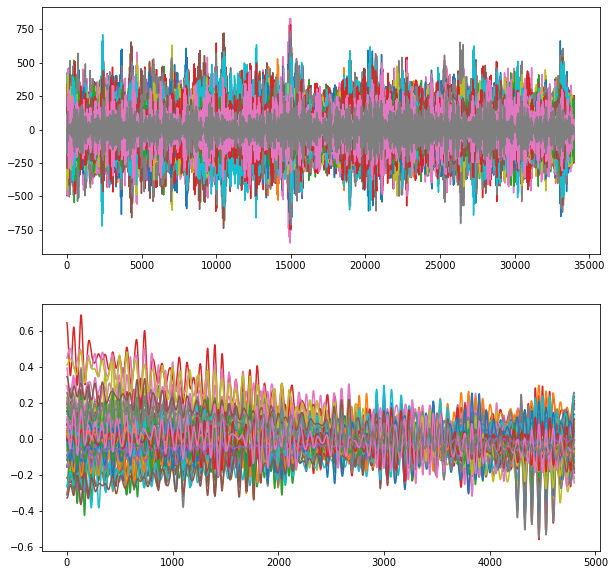

In [41]:
idx = 1
ADdataset = ADdataAfter[idx]
detAD = TVDNDetect(Ymat=ADdataset, dataType="MEG", 
                         saveDir=None, 
                         showProgress=False, 
                         fName="demoMEG",
                         MaxM=paras.MaxM,
                         Lmin=paras.Lmin, 
                         lamb=1e-16,
                         kappa=paras.kappa, 
                         freq=paras.freq,
                         r=paras.r,
                         T=paras.T,
                         is_detrend=paras.is_detrend,
                         decimateRate=paras.decimateRate, 
                         downRate=paras.downRate)
detAD.Screening(wh=paras.wh)


plt.figure(figsize=[10, 10])
plt.subplot(211)
for ix in range(detAD.Xmat.shape[0]):
    plt.plot(detAD.Ymat[ix, :])
plt.subplot(212)
for ix in range(detAD.Xmat.shape[0]):
    plt.plot(detAD.Xmat[ix, 1000:-1000])

In [19]:
for idx in tqdm(range(len(ADdataAfter))):
    ADdataset = ADdataAfter[idx]
    detAD = TVDNDetect(Ymat=ADdataset, dataType="MEG", 
                         saveDir=None, 
                         showProgress=False, 
                         fName="demoMEG",
                         MaxM=paras.MaxM,
                         Lmin=paras.Lmin, 
                         lamb=paras.lamb, 
                         kappa=paras.kappa, 
                         freq=paras.freq,
                         r=paras.r,
                         T=paras.T,
                         is_detrend=paras.is_detrend,
                         decimateRate=paras.decimateRate, 
                         downRate=paras.downRate)
    detAD.Screening(wh=paras.wh)
    detAD()
    detAD.TuningKappa(kps)
    
    saveFil = f"ADfalp_data_det_{idx}_lamb{paras.lamb:.1E}_decimate{paras.decimateRate:.0f}.pkl"
    with open(resDir/saveFil, "wb") as f:
        pickle.dump(detAD, f)

  0%|          | 0/88 [00:00<?, ?it/s]R[write to console]: 
Attaching package: ‘signal’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, poly


100%|██████████| 88/88 [25:43<00:00, 17.54s/it]


In [20]:
for idx in tqdm(range(len(CtrldataAfter))):
    Ctrldataset = CtrldataAfter[idx]
    detCtrl = TVDNDetect(Ymat=Ctrldataset, dataType="MEG", 
                         saveDir=None, 
                         showProgress=False, 
                         fName="demoMEG",
                         MaxM=paras.MaxM,
                         Lmin=paras.Lmin, 
                         lamb=paras.lamb, 
                         kappa=paras.kappa, 
                         freq=paras.freq,
                         r=paras.r,
                         T=paras.T,
                         is_detrend=paras.is_detrend,
                         decimateRate=paras.decimateRate, 
                         downRate=paras.downRate)
    detCtrl.Screening(wh=paras.wh)
    detCtrl()
    detCtrl.TuningKappa(kps)
    
    saveFil = f"Ctrlfalp_data_det_{idx}_lamb{paras.lamb:.1E}_decimate{paras.decimateRate:.0f}.pkl"
    with open(resDir/saveFil, "wb") as f:
        pickle.dump(detCtrl, f)

100%|██████████| 92/92 [27:03<00:00, 17.64s/it]


### Save results

Order of the dataset matters

In [ ]:
detObjsNum = []
ps = list(resDir.glob("AD_*04_decimate5_tuning.pkl"))
sortedPs = sorted(ps, key=lambda p:int(p.stem.split("_")[3]))
for fil in tqdm(sortedPs):
    with open(fil, "rb") as f:
        dets = pickle.load(f)
    detObjsNum.append([det.numchgs for det in dets])
    
filName = f"AD_data_lamb{dets[0].paras.lamb:.1E}_tuningNum.pkl"
with open(resDir/filName, "wb") as f:
    pickle.dump(detObjsNum, f)

In [11]:
detObjsNumC = []
ps = list(resDir.glob("Ctrl_*04_decimate5_tuning.pkl"))
sortedPs = sorted(ps, key=lambda p:int(p.stem.split("_")[3]))
for fil in tqdm(sortedPs):
    
    with open(fil, "rb") as f:
        dets = pickle.load(f)
    detObjsNumC.append([det.numchgs for det in dets])
    
filName = f"Ctrl_data_lamb{dets[0].paras.lamb:.1E}_tuningNum.pkl"
with open(resDir/filName, "wb") as f:
    pickle.dump(detObjsNumC, f)

100%|██████████| 92/92 [12:07<00:00,  7.91s/it]


In [13]:
numchgss = []
ps = list(resDir.glob("AD_*04_decimate5.pkl"))
sortedPs = sorted(ps, key=lambda p:int(p.stem.split("_")[3]))
for fil in tqdm(sortedPs):
    with open(fil, "rb") as f:
        det = pickle.load(f)
    numchgss.append(det.numchgs)
    
filName = f"AD_data_lamb{det.paras.lamb:.1E}_Num.pkl"
with open(resDir/filName, "wb") as f:
    pickle.dump(numchgss, f)

100%|██████████| 88/88 [02:38<00:00,  1.80s/it]


In [14]:
numchgss = []
ps = list(resDir.glob("Ctrl_*04_decimate5.pkl"))
sortedPs = sorted(ps, key=lambda p:int(p.stem.split("_")[3]))
for fil in tqdm(sortedPs):
    with open(fil, "rb") as f:
        det = pickle.load(f)
    numchgss.append(det.numchgs)
    
filName = f"Ctrl_data_lamb{det.paras.lamb:.1E}_Num.pkl"
with open(resDir/filName, "wb") as f:
    pickle.dump(numchgss, f)

100%|██████████| 92/92 [02:28<00:00,  1.61s/it]


### Save for filtered resutls

In [ ]:
detObjsNum = []
ps = list(resDir.glob("AD_*04_decimate5_tuning.pkl"))
sortedPs = sorted(ps, key=lambda p:int(p.stem.split("_")[3]))
for fil in tqdm(sortedPs):
    with open(fil, "rb") as f:
        dets = pickle.load(f)
    detObjsNum.append([det.numchgs for det in dets])
    
filName = f"AD_data_lamb{dets[0].paras.lamb:.1E}_tuningNum.pkl"
with open(resDir/filName, "wb") as f:
    pickle.dump(detObjsNum, f)

In [ ]:
detObjsNumC = []
ps = list(resDir.glob("Ctrlfalp_*04_decimate5_tuning.pkl"))
sortedPs = sorted(ps, key=lambda p:int(p.stem.split("_")[3]))
for fil in tqdm(sortedPs):
    
    with open(fil, "rb") as f:
        dets = pickle.load(f)
    detObjsNumC.append([det.numchgs for det in dets])
    
filName = f"Ctrlfalp_data_lamb{dets[0].paras.lamb:.1E}_tuningNum.pkl"
with open(resDir/filName, "wb") as f:
    pickle.dump(detObjsNumC, f)

  8%|▊         | 7/92 [00:46<09:23,  6.63s/it]

In [ ]:
numchgss = []
ps = list(resDir.glob("ADfalp_*04_decimate5.pkl"))
sortedPs = sorted(ps, key=lambda p:int(p.stem.split("_")[3]))
for fil in tqdm(sortedPs):
    with open(fil, "rb") as f:
        det = pickle.load(f)
    numchgss.append(det.numchgs)
    
filName = f"ADfalp_data_lamb{det.paras.lamb:.1E}_Num.pkl"
with open(resDir/filName, "wb") as f:
    pickle.dump(numchgss, f)

In [14]:
numchgss = []
ps = list(resDir.glob("Ctrlfalp_*04_decimate5.pkl"))
sortedPs = sorted(ps, key=lambda p:int(p.stem.split("_")[3]))
for fil in tqdm(sortedPs):
    with open(fil, "rb") as f:
        det = pickle.load(f)
    numchgss.append(det.numchgs)
    
filName = f"Ctrlfalp_data_lamb{det.paras.lamb:.1E}_Num.pkl"
with open(resDir/filName, "wb") as f:
    pickle.dump(numchgss, f)

100%|██████████| 92/92 [02:28<00:00,  1.61s/it]
